In [1]:
# For string manipulation and data i/o
import string
import re
import numpy as np
from numpy import array, argmax, random, take
import pandas as pd

# Deep learning libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, RepeatVector
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
from tensorflow.keras import optimizers

# For visualization and plotting
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', 200)

In [2]:
# function to read raw text file
def read_text(filename):
    # open the file
    file = open(filename, mode='rt', encoding='utf-8')
        
    # read all text
    text = file.read()
    file.close()
    return text

In [3]:
# split a text into sentences
def to_lines(text):
    sents = text.strip().split('\n')
    sents = [i.split('\t') for i in sents]
    return sents

In [4]:
data = read_text("./fra.txt")
fra_eng = to_lines(data)
fra_eng = array(deu_eng)

FileNotFoundError: ignored

In [ ]:
fra_eng = fra_eng[:10000,:]
##  i have taken only 10k sentence pairs to reduce the training time of the model.

In [ ]:
# Remove punctuation
fra_eng[:,0] = [s.translate(str.maketrans('', '', string.punctuation)) for s in fra_eng[:,0]]
fra_eng[:,1] = [s.translate(str.maketrans('', '', string.punctuation)) for s in fra_eng[:,1]]

fra_eng

array([['go', 'va ',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #1158250 (Wittydev)'],
       ['go', 'marche',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8090732 (Micsmithel)'],
       ['go', 'bouge ',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #9022935 (Micsmithel)'],
       ...,
       ['i often travel', 'je voyage fréquemment',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #992031 (CK) & #4682010 (sacredceltic)'],
       ['i owe him 100', 'je lui dois 100 ',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #260482 (CK) & #127677 (Julien_PDC)'],
       ['i own this car', 'je possède cette voiture',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #625545 (rpglover64) & #625632 (U2FS)']],
      dtype='<U325')

In [ ]:
# convert text to lowercase
for i in range(len(fra_eng)):
    fra_eng[i,0] = fra_eng[i,0].lower()
    fra_eng[i,1] = fra_eng[i,1].lower()

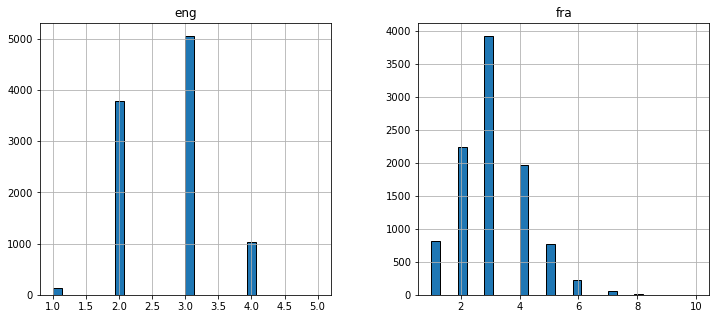

In [ ]:
# empty lists
eng_l = []
fra_l = []

# populate the lists with sentence lengths
for i in fra_eng[:,0]:
      eng_l.append(len(i.split()))

for i in fra_eng[:,1]:
      fra_l.append(len(i.split()))

length_df = pd.DataFrame({'eng':eng_l, 'fra':fra_l})

length_df.hist(bins = 30, edgecolor='k', figsize = (12,5))
plt.show()

In [ ]:
# function to build a tokenizer
def tokenization(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [ ]:
# prepare english tokenizer
eng_tokenizer = tokenization(deu_eng[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1

eng_length = 8
print('English Vocabulary Size: %d' % eng_vocab_size)

English Vocabulary Size: 2064


In [ ]:
eng_tokenizer.index_word

{1: 'i',
 2: 'it',
 3: 'tom',
 4: 'you',
 5: 'im',
 6: 'a',
 7: 'is',
 8: 'me',
 9: 'he',
 10: 'go',
 11: 'we',
 12: 'youre',
 13: 'be',
 14: 'are',
 15: 'its',
 16: 'was',
 17: 'dont',
 18: 'get',
 19: 'were',
 20: 'do',
 21: 'this',
 22: 'can',
 23: 'that',
 24: 'up',
 25: 'to',
 26: 'the',
 27: 'have',
 28: 'ill',
 29: 'come',
 30: 'did',
 31: 'they',
 32: 'take',
 33: 'no',
 34: 'like',
 35: 'in',
 36: 'let',
 37: 'out',
 38: 'love',
 39: 'my',
 40: 'need',
 41: 'got',
 42: 'here',
 43: 'keep',
 44: 'am',
 45: 'thats',
 46: 'not',
 47: 'hes',
 48: 'theyre',
 49: 'she',
 50: 'him',
 51: 'us',
 52: 'stop',
 53: 'toms',
 54: 'stay',
 55: 'who',
 56: 'help',
 57: 'well',
 58: 'look',
 59: 'home',
 60: 'lost',
 61: 'back',
 62: 'on',
 63: 'what',
 64: 'all',
 65: 'how',
 66: 'feel',
 67: 'must',
 68: 'see',
 69: 'down',
 70: 'try',
 71: 'away',
 72: 'felt',
 73: 'lets',
 74: 'want',
 75: 'please',
 76: 'busy',
 77: 'hate',
 78: 'wait',
 79: 'saw',
 80: 'your',
 81: 'know',
 82: 'had',
 

In [ ]:
# prepare French tokenizer
fra_tokenizer = tokenization(fra_eng[:, 1])
fra_vocab_size = len(fra_tokenizer.word_index) + 1

fra_length = 8
print('French Vocabulary Size: %d' % fra_vocab_size)

Deutch Vocabulary Size: 4769


In [ ]:
# encode and pad sequences
def encode_sequences(tokenizer, length, lines):
    seq = tokenizer.texts_to_sequences(lines)
    # pad sequences with 0 values
    seq = pad_sequences(seq, maxlen=length, padding='post')
    return seq

In [ ]:
from sklearn.model_selection import train_test_split

# split data into train and test set
train, test = train_test_split(deu_eng, test_size=0.2, random_state = 12)

In [ ]:
# prepare training data
trainX = encode_sequences(fra_tokenizer, fra_length, train[:, 1])   
trainY = encode_sequences(eng_tokenizer, eng_length, train[:, 0])   

# prepare validation data
testX = encode_sequences(fra_tokenizer, fra_length, test[:, 1])
testY = encode_sequences(eng_tokenizer, eng_length, test[:, 0])

In [ ]:
trainX[:5]


array([[  27,   19,   32,  945,    0,    0,    0,    0],
       [   5,    9,  165, 2001,    0,    0,    0,    0],
       [   1,    3, 2929,    0,    0,    0,    0,    0],
       [ 242,    9,    2,    0,    0,    0,    0,    0],
       [   2,    9,  373,    0,    0,    0,    0,    0]])

In [ ]:
# build NMT model
def define_model(in_vocab,out_vocab, in_timesteps,out_timesteps,units):
    # sequential model for seq2seq network
    model = Sequential()
    # add embedding layer
    model.add(Embedding(in_vocab, units, input_length=in_timesteps, mask_zero=True))
    # LSTM network
    model.add(LSTM(units))
    model.add(RepeatVector(out_timesteps))
    model.add(LSTM(units, return_sequences=True))
    model.add(Dense(out_vocab, activation='softmax'))
    return model

In [ ]:
# model compilation
model = define_model(fra_vocab_size, eng_vocab_size, fra_length, eng_length, 512)

In [ ]:
rms = optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=rms, loss='sparse_categorical_crossentropy')

In [ ]:
fl = 'seq_2_seq_model'

In [ ]:
checkpoint = ModelCheckpoint(fl, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# train model
history = model.fit(trainX, trainY.reshape(trainY.shape[0], trainY.shape[1], 1),
                    epochs=30, batch_size=128, validation_split = 0.2,callbacks=[checkpoint], 
                    verbose=1)

Epoch 1/30
50/50 [==============================] - ETA: 0s - loss: 3.4129
Epoch 1: val_loss improved from inf to 2.47315, saving model to seq_2_seq_model


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


50/50 [==============================] - 83s 2s/step - loss: 3.4129 - val_loss: 2.4731
Epoch 2/30
50/50 [==============================] - ETA: 0s - loss: 2.3318
Epoch 2: val_loss improved from 2.47315 to 2.16221, saving model to seq_2_seq_model


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


50/50 [==============================] - 75s 2s/step - loss: 2.3318 - val_loss: 2.1622
Epoch 3/30
50/50 [==============================] - ETA: 0s - loss: 2.0749
Epoch 3: val_loss improved from 2.16221 to 2.02231, saving model to seq_2_seq_model


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


50/50 [==============================] - 74s 1s/step - loss: 2.0749 - val_loss: 2.0223
Epoch 4/30
50/50 [==============================] - ETA: 0s - loss: 1.9972
Epoch 4: val_loss improved from 2.02231 to 1.98287, saving model to seq_2_seq_model


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


50/50 [==============================] - 73s 1s/step - loss: 1.9972 - val_loss: 1.9829
Epoch 5/30
50/50 [==============================] - ETA: 0s - loss: 1.9623
Epoch 5: val_loss improved from 1.98287 to 1.95809, saving model to seq_2_seq_model


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


50/50 [==============================] - 84s 2s/step - loss: 1.9623 - val_loss: 1.9581
Epoch 6/30
50/50 [==============================] - ETA: 0s - loss: 1.9369
Epoch 6: val_loss improved from 1.95809 to 1.94166, saving model to seq_2_seq_model


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


50/50 [==============================] - 103s 2s/step - loss: 1.9369 - val_loss: 1.9417
Epoch 7/30
50/50 [==============================] - ETA: 0s - loss: 1.9179
Epoch 7: val_loss improved from 1.94166 to 1.92736, saving model to seq_2_seq_model


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


50/50 [==============================] - 110s 2s/step - loss: 1.9179 - val_loss: 1.9274
Epoch 8/30
50/50 [==============================] - ETA: 0s - loss: 1.8971
Epoch 8: val_loss improved from 1.92736 to 1.90537, saving model to seq_2_seq_model


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


50/50 [==============================] - 86s 2s/step - loss: 1.8971 - val_loss: 1.9054
Epoch 9/30
50/50 [==============================] - ETA: 0s - loss: 1.8782
Epoch 9: val_loss improved from 1.90537 to 1.88692, saving model to seq_2_seq_model


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


50/50 [==============================] - 95s 2s/step - loss: 1.8782 - val_loss: 1.8869
Epoch 10/30
50/50 [==============================] - ETA: 0s - loss: 1.8574
Epoch 10: val_loss improved from 1.88692 to 1.87023, saving model to seq_2_seq_model


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


50/50 [==============================] - 105s 2s/step - loss: 1.8574 - val_loss: 1.8702
Epoch 11/30
50/50 [==============================] - ETA: 0s - loss: 1.8371
Epoch 11: val_loss improved from 1.87023 to 1.85601, saving model to seq_2_seq_model


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


50/50 [==============================] - 89s 2s/step - loss: 1.8371 - val_loss: 1.8560
Epoch 12/30
50/50 [==============================] - ETA: 0s - loss: 1.8188
Epoch 12: val_loss improved from 1.85601 to 1.83774, saving model to seq_2_seq_model


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


50/50 [==============================] - 78s 2s/step - loss: 1.8188 - val_loss: 1.8377
Epoch 13/30
50/50 [==============================] - ETA: 0s - loss: 1.8002
Epoch 13: val_loss improved from 1.83774 to 1.82570, saving model to seq_2_seq_model


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


50/50 [==============================] - 81s 2s/step - loss: 1.8002 - val_loss: 1.8257
Epoch 14/30
50/50 [==============================] - ETA: 0s - loss: 1.7830
Epoch 14: val_loss improved from 1.82570 to 1.81283, saving model to seq_2_seq_model


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


50/50 [==============================] - 81s 2s/step - loss: 1.7830 - val_loss: 1.8128
Epoch 15/30
50/50 [==============================] - ETA: 0s - loss: 1.7666
Epoch 15: val_loss improved from 1.81283 to 1.79855, saving model to seq_2_seq_model


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


50/50 [==============================] - 74s 1s/step - loss: 1.7666 - val_loss: 1.7986
Epoch 16/30
50/50 [==============================] - ETA: 0s - loss: 1.7482
Epoch 16: val_loss improved from 1.79855 to 1.78929, saving model to seq_2_seq_model


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


50/50 [==============================] - 74s 2s/step - loss: 1.7482 - val_loss: 1.7893
Epoch 17/30
50/50 [==============================] - ETA: 0s - loss: 1.7311
Epoch 17: val_loss did not improve from 1.78929
50/50 [==============================] - 39s 787ms/step - loss: 1.7311 - val_loss: 1.7911
Epoch 18/30
50/50 [==============================] - ETA: 0s - loss: 1.7151
Epoch 18: val_loss improved from 1.78929 to 1.75979, saving model to seq_2_seq_model


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


50/50 [==============================] - 81s 2s/step - loss: 1.7151 - val_loss: 1.7598
Epoch 19/30
50/50 [==============================] - ETA: 0s - loss: 1.7005
Epoch 19: val_loss improved from 1.75979 to 1.74845, saving model to seq_2_seq_model


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


50/50 [==============================] - 76s 2s/step - loss: 1.7005 - val_loss: 1.7485
Epoch 20/30
50/50 [==============================] - ETA: 0s - loss: 1.6834
Epoch 20: val_loss improved from 1.74845 to 1.73906, saving model to seq_2_seq_model


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


50/50 [==============================] - 73s 1s/step - loss: 1.6834 - val_loss: 1.7391
Epoch 21/30
50/50 [==============================] - ETA: 0s - loss: 1.6670
Epoch 21: val_loss improved from 1.73906 to 1.72576, saving model to seq_2_seq_model


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


50/50 [==============================] - 88s 2s/step - loss: 1.6670 - val_loss: 1.7258
Epoch 22/30
50/50 [==============================] - ETA: 0s - loss: 1.6543
Epoch 22: val_loss did not improve from 1.72576
50/50 [==============================] - 38s 760ms/step - loss: 1.6543 - val_loss: 1.7429
Epoch 23/30
50/50 [==============================] - ETA: 0s - loss: 1.6404
Epoch 23: val_loss improved from 1.72576 to 1.70883, saving model to seq_2_seq_model


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


50/50 [==============================] - 78s 2s/step - loss: 1.6404 - val_loss: 1.7088
Epoch 24/30
50/50 [==============================] - ETA: 0s - loss: 1.6253
Epoch 24: val_loss improved from 1.70883 to 1.70705, saving model to seq_2_seq_model


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


50/50 [==============================] - 75s 2s/step - loss: 1.6253 - val_loss: 1.7070
Epoch 25/30
50/50 [==============================] - ETA: 0s - loss: 1.6128
Epoch 25: val_loss improved from 1.70705 to 1.69178, saving model to seq_2_seq_model


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


50/50 [==============================] - 76s 2s/step - loss: 1.6128 - val_loss: 1.6918
Epoch 26/30
50/50 [==============================] - ETA: 0s - loss: 1.6013
Epoch 26: val_loss improved from 1.69178 to 1.69132, saving model to seq_2_seq_model


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


50/50 [==============================] - 83s 2s/step - loss: 1.6013 - val_loss: 1.6913
Epoch 27/30
50/50 [==============================] - ETA: 0s - loss: 1.5853
Epoch 27: val_loss improved from 1.69132 to 1.67250, saving model to seq_2_seq_model


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


50/50 [==============================] - 73s 1s/step - loss: 1.5853 - val_loss: 1.6725
Epoch 28/30
50/50 [==============================] - ETA: 0s - loss: 1.5722
Epoch 28: val_loss improved from 1.67250 to 1.66057, saving model to seq_2_seq_model


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


50/50 [==============================] - 75s 2s/step - loss: 1.5722 - val_loss: 1.6606
Epoch 29/30
50/50 [==============================] - ETA: 0s - loss: 1.5519
Epoch 29: val_loss improved from 1.66057 to 1.66014, saving model to seq_2_seq_model


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


50/50 [==============================] - 79s 2s/step - loss: 1.5519 - val_loss: 1.6601
Epoch 30/30
50/50 [==============================] - ETA: 0s - loss: 1.5392
Epoch 30: val_loss improved from 1.66014 to 1.65092, saving model to seq_2_seq_model


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


INFO:tensorflow:Assets written to: seq_2_seq_model\assets


50/50 [==============================] - 115s 2s/step - loss: 1.5392 - val_loss: 1.6509


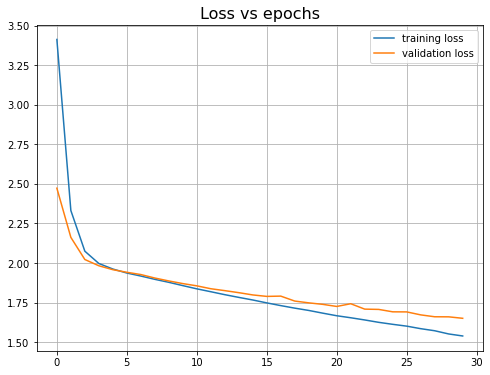

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss','validation loss'])
plt.grid()
plt.title("Loss vs epochs",fontsize=16)
plt.show()

In [ ]:
model = load_model(fl)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 8, 512)            2441728   
                                                                 
 lstm (LSTM)                 (None, 512)               2099200   
                                                                 
 repeat_vector (RepeatVector  (None, 8, 512)           0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 8, 512)            2099200   
                                                                 
 dense (Dense)               (None, 8, 2064)           1058832   
                                                                 
Total params: 7,698,960
Trainable params: 7,698,960
Non-trainable params: 0
______________________________________________

In [ ]:
preds = model.predict(testX.reshape((testX.shape[0],testX.shape[1]))[:1024,:],batch_size=128)

8/8 [==============================] - 4s 204ms/step


In [ ]:
preds = preds.argmax(axis=2)

In [ ]:
def get_word(n, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == n:
            return word
    return None

In [ ]:
preds_text = []
for i in preds:
    temp = []
    for j in range(len(i)):
        t = get_word(i[j], eng_tokenizer)
        if j > 0:
            if (t == get_word(i[j-1], eng_tokenizer)) or (t == None):
                temp.append('')
            else:
                temp.append(t)
        else:
            if(t == None):
                temp.append('')
            else:
                temp.append(t) 

    preds_text.append(' '.join(temp))

In [ ]:
pred_df = pd.DataFrame({'actual' : test[:1024,0], 'predicted' : preds_text})

In [ ]:
pred_df.head(10)


,actual,predicted
0,tom is drunk,tom is
1,you seem busy,who a
2,im married,im am
3,whos talking,be you
4,eat your peas,were you
5,i had no idea,i feel
6,use them all,are you
7,i am very tall,im am
8,i have plans,i have
9,i hurt tom,i have
